# Gamma Ray Log Prediction using Machine Learning

# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_df = pd.read_csv('train.csv')


# Adding new column

In [3]:
train_df['window'] = train_df['CALI'] - train_df['BS']
train_df = train_df.drop(['CALI'],axis=1)

In [4]:
# well_1 = train_df[train_df['WELL']==1]
# well_2 = train_df[train_df['WELL']==2]
# well_3 = train_df[train_df['WELL']==3]
# train_df = pd.concat([well_1,well_3],ignore_index=True)


# Display train well data

In [5]:
train_df.head()

BS       CALI      RHOB      NPHI       PEF         GR  WELL  \
0  12.250001  12.393208  2.441939  0.246022  3.125365  66.894035     1   
1  12.250001  12.385510  2.443760  0.197339  3.097646  63.302853     1   
2  12.250001  12.381071  2.452413  0.172322  3.023572  53.094990     1   
3  12.250001  12.382106  2.464291  0.167161  3.008530  45.049633     1   
4  12.250001  12.379314  2.477295  0.173416  3.174208  35.136986     1   

      DEPTH_MD    window  
0  8327.630188  0.143207  
1  8328.128875  0.135509  
2  8328.627563  0.131070  
3  8329.126251  0.132105  
4  8329.624938  0.129313

In [6]:
well_1 = train_df[train_df['WELL']==1]
well_3 = train_df[train_df['WELL']==3]
train_df = train_df.drop(['WELL'],axis=1)

# Well_1

<ipython-input-7-46ab43c63c6b>:21: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2.5)


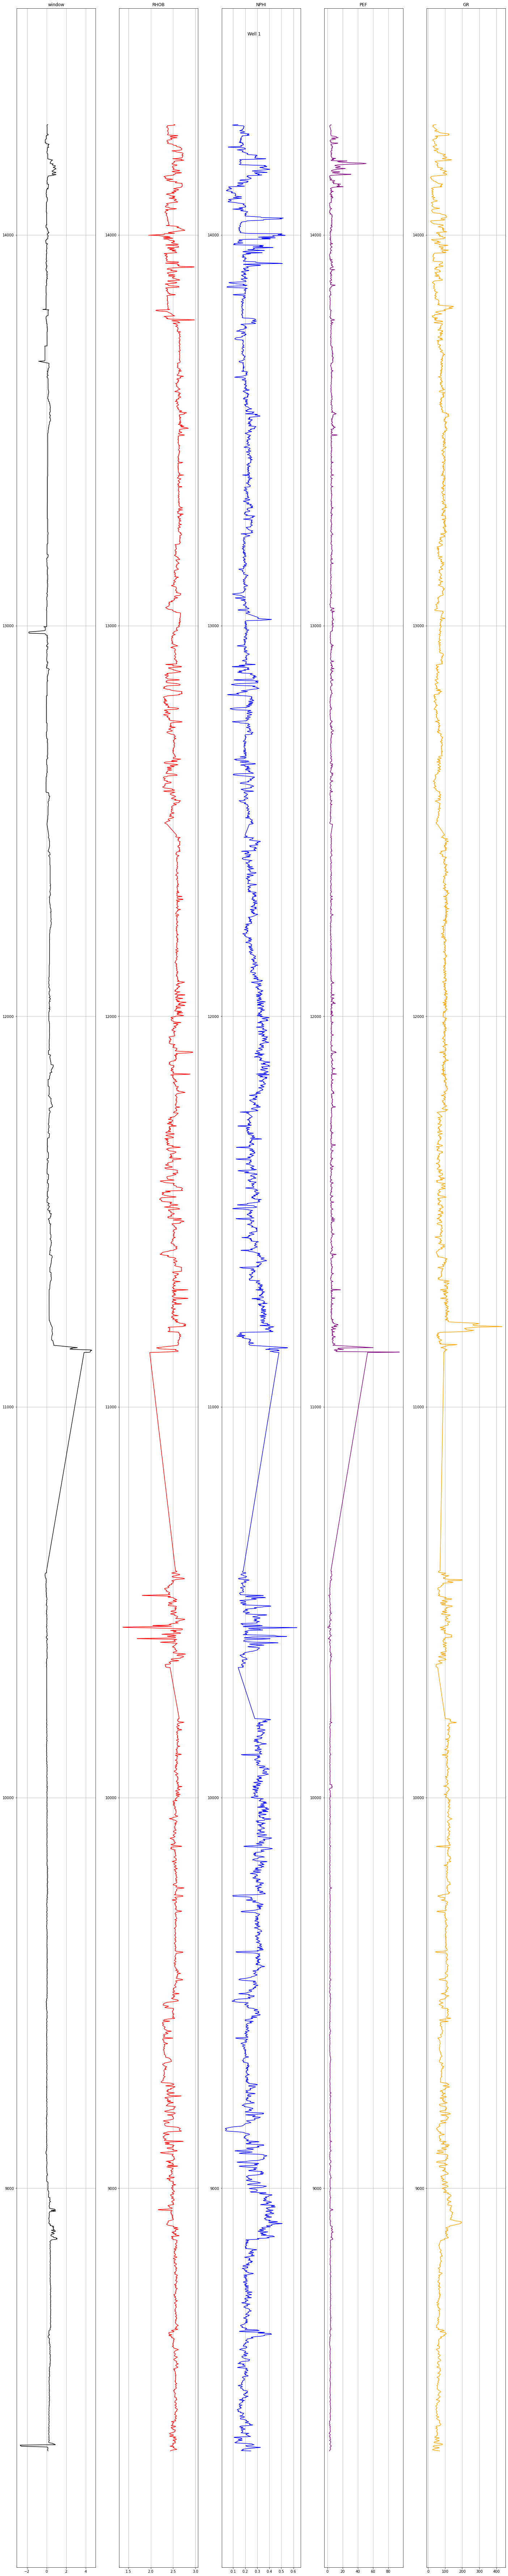

In [7]:
# Display train well data
well = well_1 # train wells: well1, well3

# define what logs are we going to us
logs = ['window','RHOB', 'NPHI',  'PEF', 'GR']
# create the subplots; ncols equals the number of logs

fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,100))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'purple', 'orange', 'green']

for i in range(len(logs)):
    ax[i].plot(well[logs[i]], well['DEPTH_MD'], color=colors[i])
  
    ax[i].set_title(logs[i])
    ax[i].grid(True)

fig.suptitle("Well 1") 
plt.tight_layout(2.5)
plt.show()

# Well_3

<ipython-input-8-87313fc6a7a0>:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2.5)


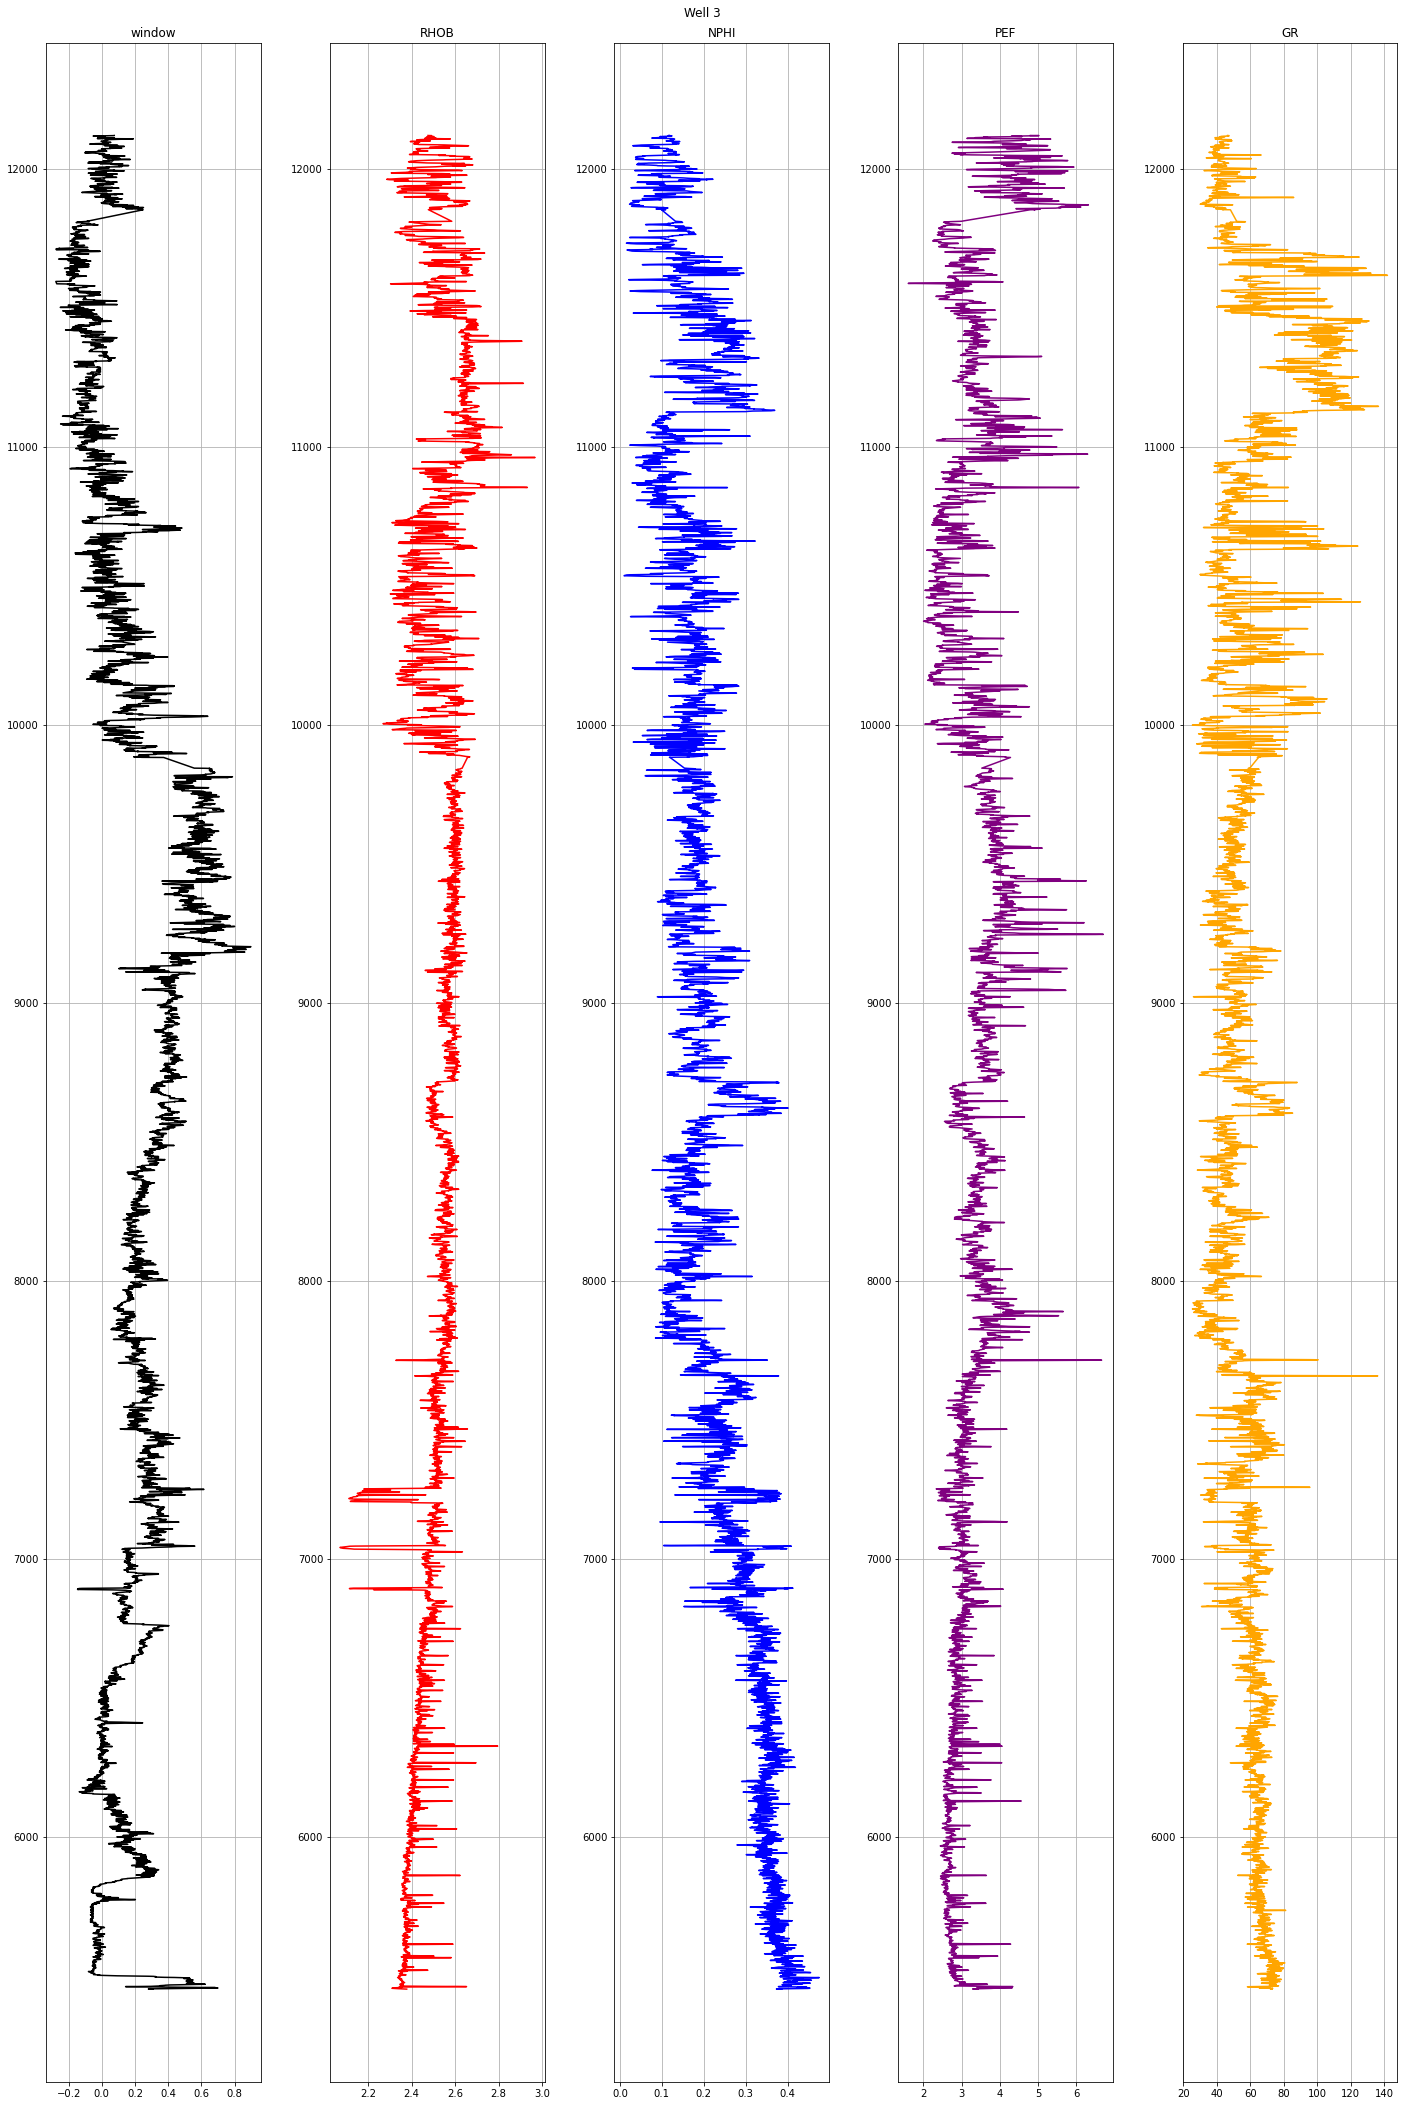

In [8]:
# Display train well data
well = well_3 # train wells: well1, well3

# define what logs are we going to us
logs = ['window',
#         'CALI,
        'RHOB', 'NPHI',  'PEF', 'GR']

# create the subplots; ncols equals the number of logs

fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,30))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'purple', 'orange', 'green']

for i in range(len(logs)):
    ax[i].plot(well[logs[i]], well['DEPTH_MD'], color=colors[i])
  
    ax[i].set_title(logs[i])
    ax[i].grid(True)

fig.suptitle("Well 3") 
plt.tight_layout(2.5)
plt.show()

<ipython-input-9-be89c0792247>:24: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


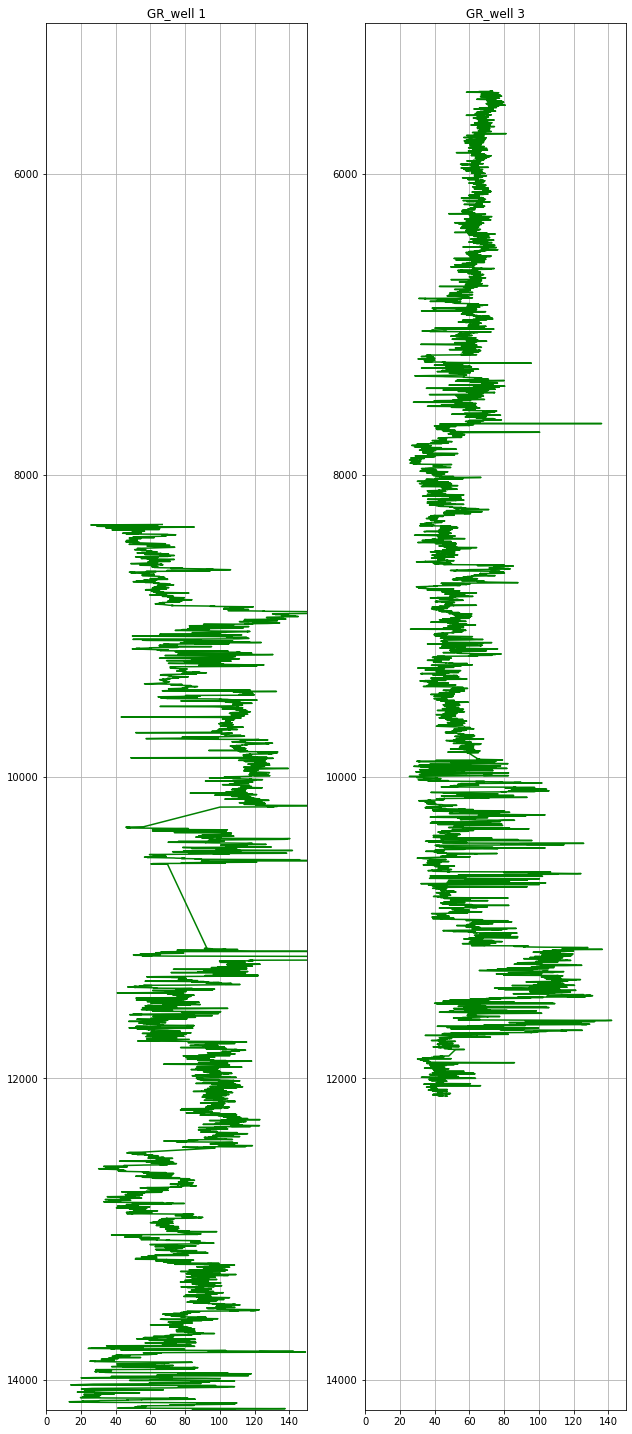

In [9]:
# Display only GR logs for the 3 wells:

plt.figure(figsize=(9,20))
# ['NPHI', 'RHOB', 'GR', 'PEF', 'CALI', 'BS','DEPTH_MD']

plt.subplot(1,2,1)
plt.plot(well_1['GR'], well_1['DEPTH_MD'], color='green')
plt.ylim(14200, 5000)
plt.xlim(0,150)
plt.title('GR_well 1', size=12)
plt.grid(True)


# =======================================================================


plt.subplot(1,2,2)
plt.plot(well_3['GR'], well_3['DEPTH_MD'], color='green')
plt.ylim(14200, 5000)
plt.xlim(0,150)
plt.title('GR_well 3', size=12)
plt.grid(True)

plt.tight_layout(1)
plt.show()

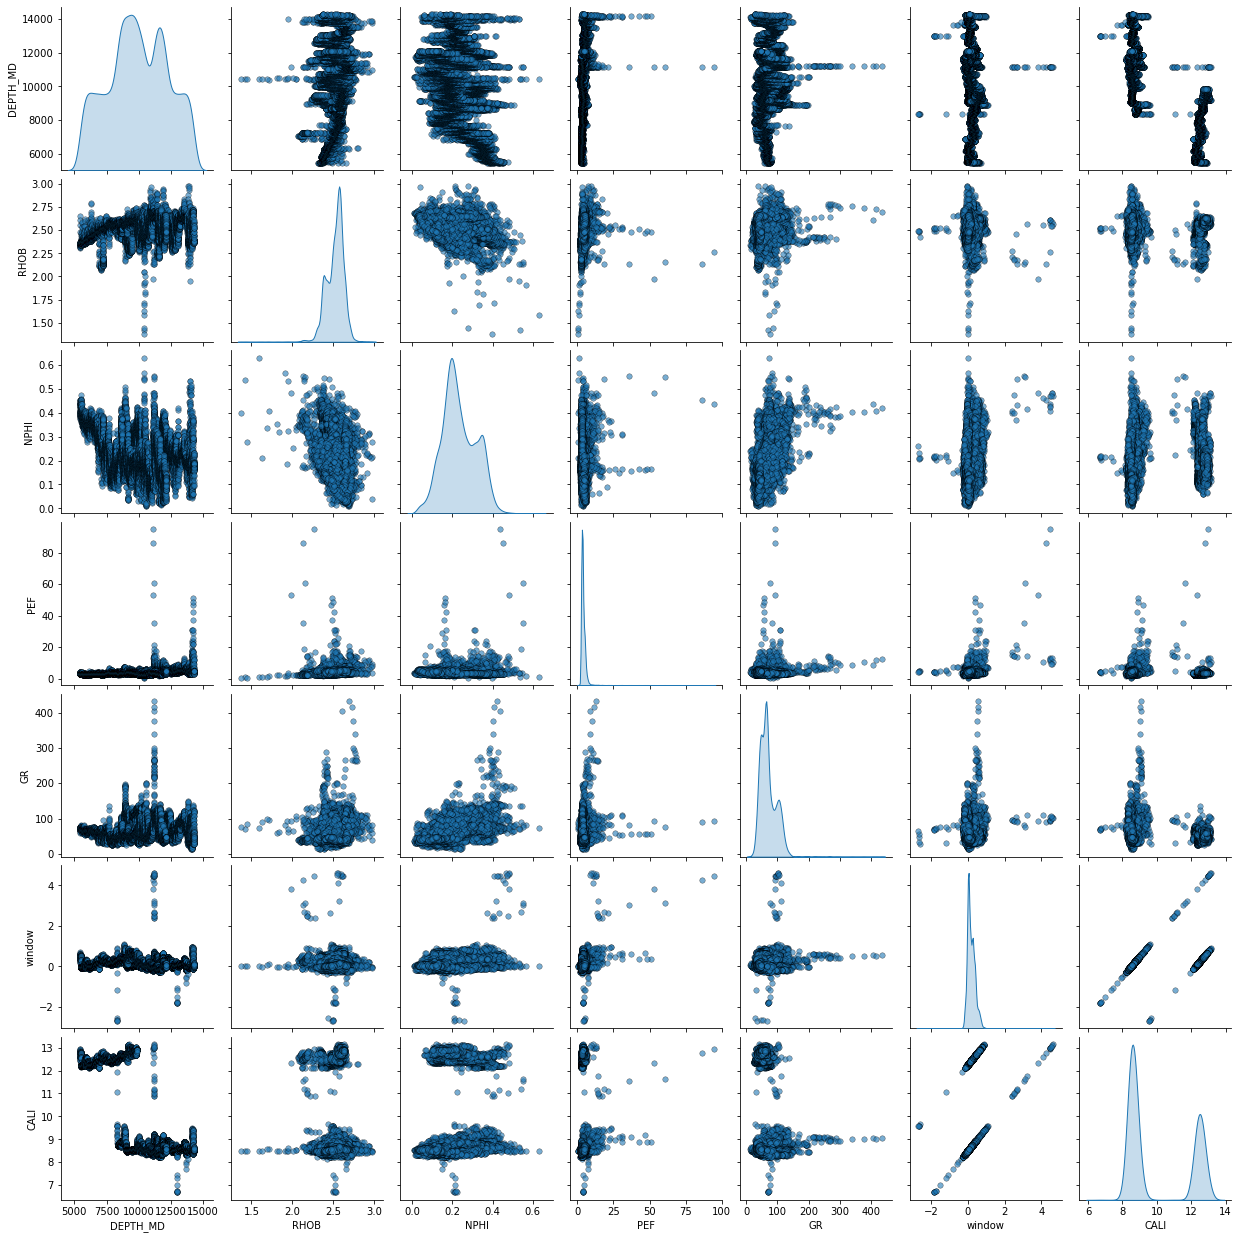

In [12]:
train_features = ['DEPTH_MD','RHOB', 'NPHI', 'PEF', 'GR','window','CALI']

sns.pairplot(train_df, vars=train_features, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

<ipython-input-13-b6c58986fda5>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(well_train_only_features.corr(method = 'spearman') , dtype=np.bool)


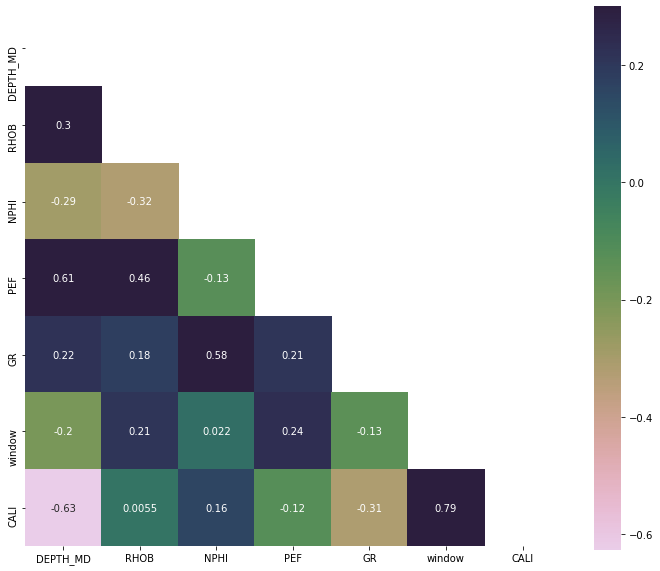

In [13]:
well_train_only_features = train_df[train_features]

# Generate a mask for the upper triangle
mask = np.zeros_like(well_train_only_features.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(well_train_only_features.corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=.3, square=True)

plt.show()

# Normalization

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer


train_copy = train_df.copy()
train_copy = train_copy.drop(['DEPTH_MD'],axis=1)


# normalize using power transform Yeo-Johnson method
scaler = PowerTransformer(method='yeo-johnson')

In [13]:
feature_target=train_copy.columns

In [14]:
ct = ColumnTransformer([('transform', scaler, feature_target)], remainder='passthrough')

# fit and transform
well_train_norm = ct.fit_transform(train_copy)

# convert to dataframe
well_train_norm = pd.DataFrame(well_train_norm, columns=feature_target)


well_train_norm['DEPTH_MD']= train_df['DEPTH_MD']
well_train_norm.head()

BS      RHOB      NPHI       PEF        GR    window     DEPTH_MD
0  1.301818 -0.809141  0.212490 -0.602736  0.064218 -0.092120  8327.630188
1  1.301818 -0.793188 -0.376966 -0.640975 -0.088566 -0.125979  8328.128875
2  1.301818 -0.716724 -0.693899 -0.746109 -0.576994 -0.145557  8328.627563
3  1.301818 -0.609941 -0.760533 -0.767999 -1.035323 -0.140991  8329.126251
4  1.301818 -0.490590 -0.679825 -0.536764 -1.731454 -0.153314  8329.624938

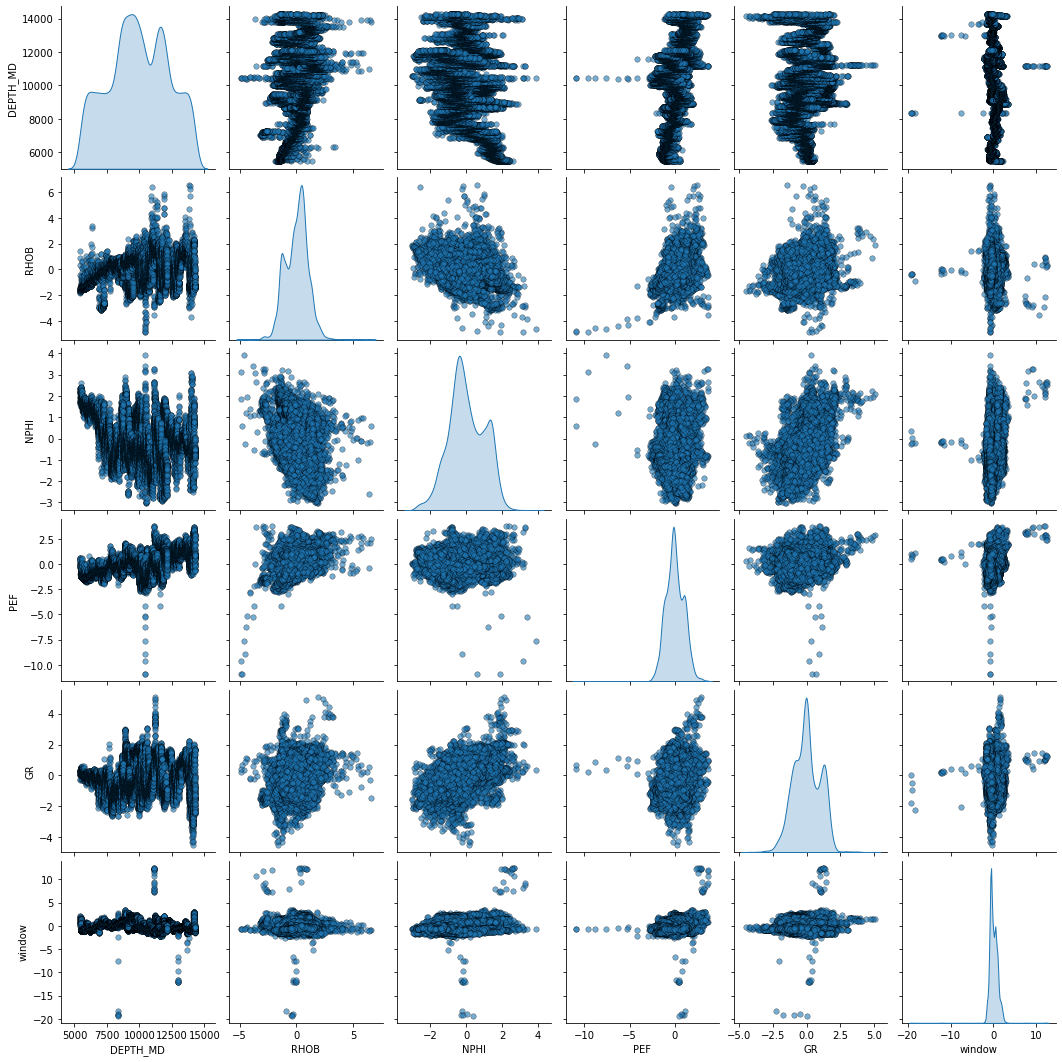

In [15]:
train_features = ['DEPTH_MD','RHOB', 'NPHI', 'PEF', 'GR','window']

sns.pairplot(well_train_norm, vars=train_features, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

Text(0.5, 1.0, 'Before Outlier Removal')

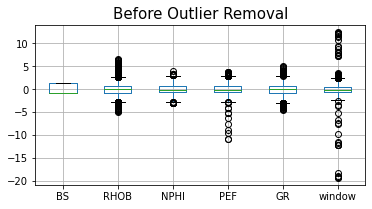

In [16]:
plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_train_norm[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)


# Remove outliers

In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

#======================================================================
# make copy of well_train_norm, called well_train_dropped
well_train_drop = well_train_norm.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop = well_train_norm.drop(['DEPTH_MD'], axis=1)

#======================================================================

# Method 1: Standard Deviation Method (traditional)
well_train_std = well_train_drop[np.abs(well_train_drop - well_train_drop.mean()) <= (3 * well_train_drop.std())]

## delete all rows that have NaNs
well_train_std = well_train_std.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop)
mask = yhat != -1
well_train_iso = well_train_norm[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop)
mask = yhat != -1
well_train_ee = well_train_norm[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop)
mask = yhat != -1
well_train_lof = well_train_norm[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop)
mask = yhat != -1
well_train_svm = well_train_norm[mask]

Number of points before outliers removed                       : 18917
Number of points after outliers removed with Standard Deviation: 18659
Number of points after outliers removed with Isolation Forest  : 9459
Number of points after outliers removed with Min. Covariance   : 17025
Number of points after outliers removed with Outlier Factor    : 13242
Number of points after outliers removed with One-class SVM     : 17028


<ipython-input-18-22f1e3ac6e29>:34: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.7)


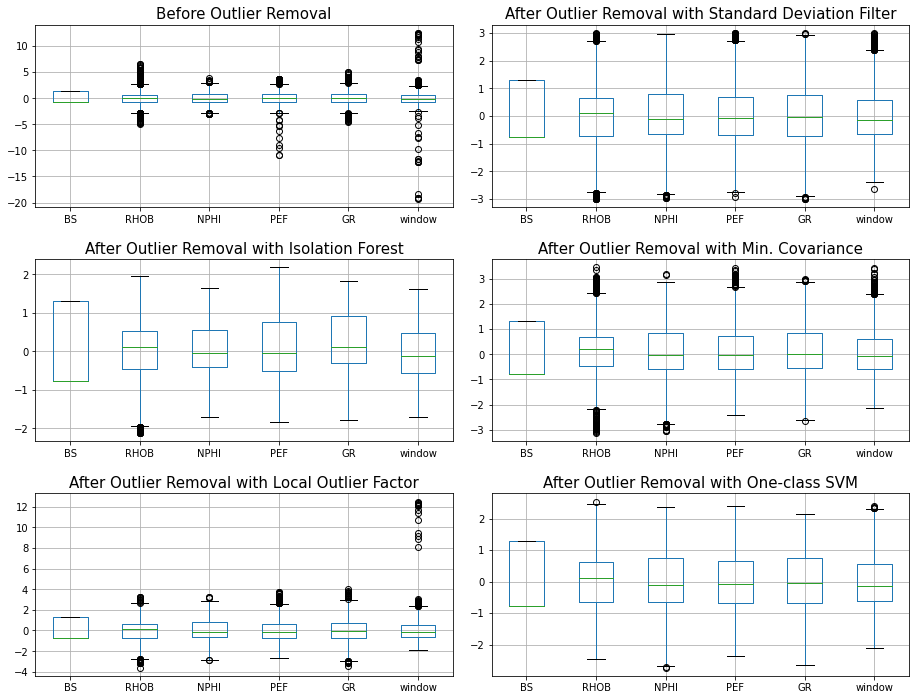

In [18]:
print('Number of points before outliers removed                       :', len(well_train_norm))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_train_norm[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

The best Method we used was Method 5 (One-class SVM) 
so it is the best method to remove outliers 

In [19]:
from sklearn.svm import OneClassSVM

# make copy of well_train_norm, called well_train_dropped
# well_train__drop= well_train_norm.copy()


# # removing outliers using One-class SVM
# svm = OneClassSVM(nu=0.1)
# yhat = svm.fit_predict(well_train_drop)
# mask = yhat != -1
# well_train_SVM = well_train_norm[mask]

# well_train_SVM.head()


# svm = OneClassSVM(nu=0.1)
# yhat = svm.fit_predict(well_train_drop)
# mask = yhat != -1
# well_train_svm = well_train_norm[mask]

Text(0.5, 1.0, 'After Outlier Removal with One-class SVM')

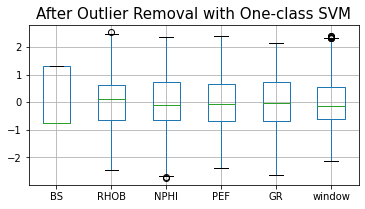

In [20]:
plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)


In [21]:
well_train_svm['DEPTH_MD'] = well_train_norm['DEPTH_MD']

<ipython-input-21-cba039d24692>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_train_svm['DEPTH_MD'] = well_train_norm['DEPTH_MD']


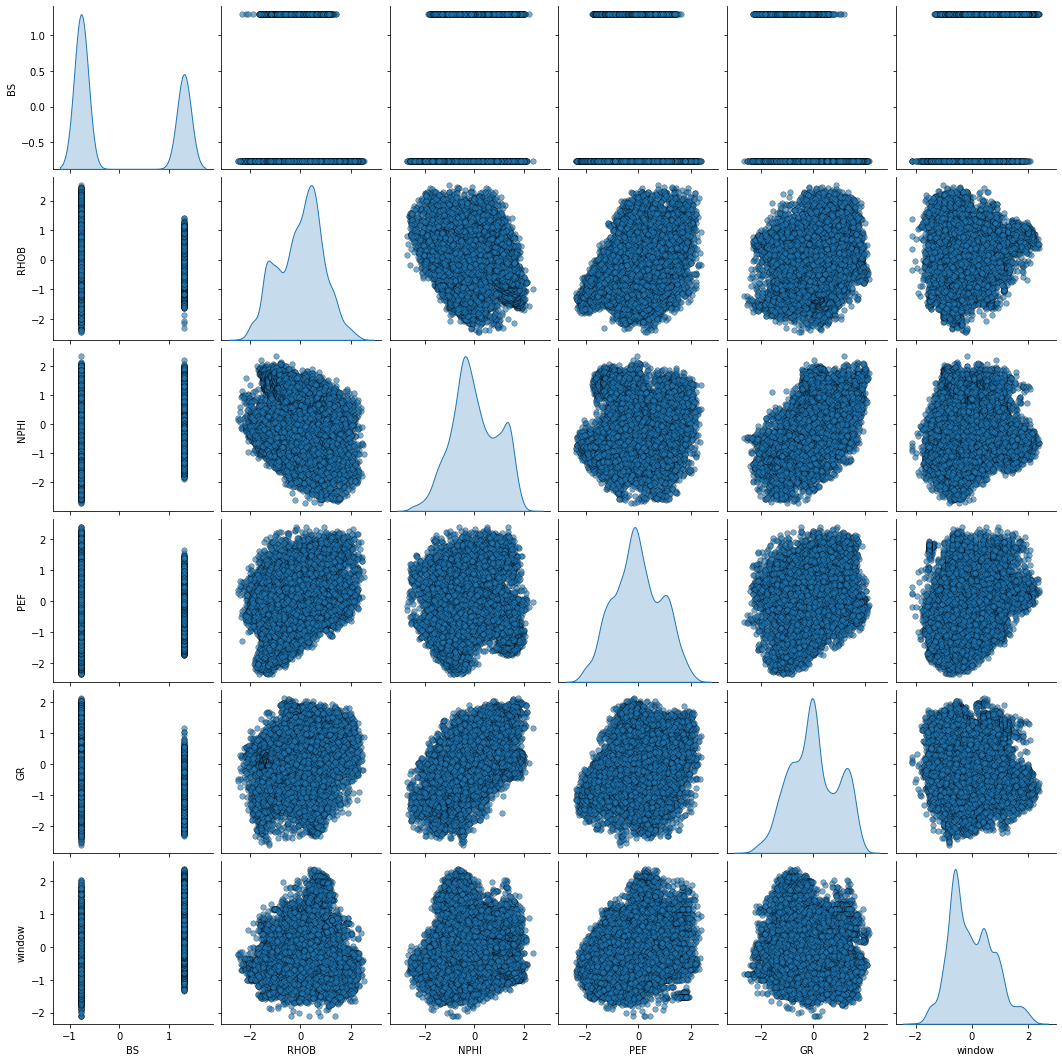

In [22]:
sns.pairplot(well_train_svm, vars=feature_target,
             diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

# Models

In [23]:
y_df= well_train_svm.GR
x_df = well_train_svm.drop(['GR'],axis=1)

In [24]:
x_df.head()

BS      RHOB      NPHI       PEF    window     DEPTH_MD
0  1.301818 -0.809141  0.212490 -0.602736 -0.092120  8327.630188
1  1.301818 -0.793188 -0.376966 -0.640975 -0.125979  8328.128875
2  1.301818 -0.716724 -0.693899 -0.746109 -0.145557  8328.627563
3  1.301818 -0.609941 -0.760533 -0.767999 -0.140991  8329.126251
4  1.301818 -0.490590 -0.679825 -0.536764 -0.153314  8329.624938

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_df , y_df , test_size = 0.01, random_state = 10)

In [26]:
x_train.isnull().sum()

BS          0
RHOB        0
NPHI        0
PEF         0
window      0
DEPTH_MD    0
dtype: int64

# 

Ridge & Lasso

In [27]:
from sklearn.linear_model import Lasso ,Ridge
from sklearn.metrics import r2_score


LRRidge= Ridge()
LRRidge.fit(x_train, y_train)
LRRidge.score(x_train, y_train)

0.7631573955269606

In [28]:
LRLasso = Lasso(alpha=0.0075, fit_intercept=True, 
            precompute=True, max_iter=1000, tol=0.0001,
            warm_start=True, random_state=611)
LRLasso.fit(x_train, y_train)
LRLasso.score(x_train, y_train)

0.7624251794530876

In [29]:
y_pred_tr_Lasso = LRLasso.predict(x_train)
y_pred_tr_Ridge = LRRidge.predict(x_train)
#===============================
y_pred_val_Lasso = LRLasso.predict(x_val)
y_pred_val_Ridge = LRRidge.predict(x_val)


In [30]:
print("R2_score of Lasso:",r2_score(y_pred_tr_Lasso , y_train))
print("R2_score of Ridge:",r2_score(y_pred_tr_Ridge , y_train))


R2_score of Lasso: 0.6755536972511014
R2_score of Ridge: 0.689594094912167


In [31]:
print("R2_score of Lasso:",r2_score(y_pred_val_Lasso , y_val))
print("R2_score of Ridge:",r2_score(y_pred_val_Ridge , y_val))


R2_score of Lasso: 0.6850929368848924
R2_score of Ridge: 0.6956312592981597


# 

LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR = LinearRegression()
LR.fit(x_train, y_train)


y_pred_val_LR = LR.predict(x_val)

print("R2_score of LinearRegression:",r2_score(y_pred_val_LR , y_val))


R2_score of LinearRegression: 0.6956718537248283


# 

Deep Learning

In [33]:
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv1D(128, 2, activation="relu", input_shape=(6, 1)))
model.add(Conv1D(128, 2, activation="relu"))
# model.add(Conv1D(128, 2, activation="relu"))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
# model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
# model.add(Dense(32, activation="relu"))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
model.compile(loss="mse", optimizer="adam")
# model.summary()
history = model.fit(x_train, y_train,epochs=200)

Epoch 1/200
527/527 [==============================] - 3s 3ms/step - loss: 7.1567
Epoch 2/200
527/527 [==============================] - 2s 3ms/step - loss: 0.2910
Epoch 3/200
527/527 [==============================] - 2s 3ms/step - loss: 0.2855
Epoch 4/200
527/527 [==============================] - 2s 3ms/step - loss: 0.3197
Epoch 5/200
527/527 [==============================] - 2s 3ms/step - loss: 0.2653
Epoch 6/200
527/527 [==============================] - 2s 3ms/step - loss: 0.2256
Epoch 7/200
527/527 [==============================] - 2s 3ms/step - loss: 0.2156
Epoch 8/200
527/527 [==============================] - 2s 4ms/step - loss: 0.2178
Epoch 9/200
527/527 [==============================] - 2s 4ms/step - loss: 0.1951
Epoch 10/200
527/527 [==============================] - 2s 4ms/step - loss: 0.1800
Epoch 11/200
527/527 [==============================] - 2s 3ms/step - loss: 0.6750
Epoch 12/200
527/527 [==============================] - 2s 3ms/step - loss: 0.1735
Epoch 13/200


527/527 [==============================] - 2s 4ms/step - loss: 0.0630
Epoch 194/200
527/527 [==============================] - 2s 4ms/step - loss: 0.0618
Epoch 195/200
527/527 [==============================] - 2s 4ms/step - loss: 0.0645
Epoch 196/200
527/527 [==============================] - 2s 4ms/step - loss: 0.0627
Epoch 197/200
527/527 [==============================] - 2s 4ms/step - loss: 0.0613
Epoch 198/200
527/527 [==============================] - 2s 4ms/step - loss: 0.0623
Epoch 199/200
527/527 [==============================] - 2s 4ms/step - loss: 0.0623
Epoch 200/200
527/527 [==============================] - 2s 4ms/step - loss: 0.0607


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 128)            384       
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 128)            32896     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 107,265
Trainable params: 107,265
Non-trai

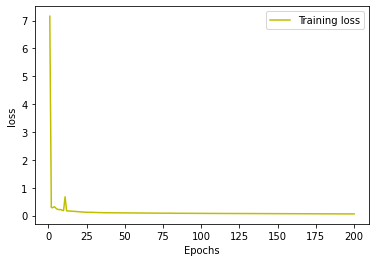

In [35]:
from matplotlib import pyplot as plt

loss = history.history['loss']
epochs = range(1 , len(loss)+1)
plt.plot(epochs , loss , 'y',label ='Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
ypred_tr = model.predict(x_train)
ypred_val = model.predict(x_val)

DL_tr = round(r2_score(ypred_tr , y_train)*100,2)
DL_val = round(r2_score(ypred_val , y_val)*100,2)

print("R2_score Waht model learn:",DL_tr)
print("R2_score of DL:",DL_val)


R2_score Waht model learn: 92.88
R2_score of DL: 90.12


# 

HistGradientBoosting Regressor

In [37]:
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import HistGradientBoostingRegressor
HGR = HistGradientBoostingRegressor(max_iter=350,max_leaf_nodes=60,random_state=42)
HGR.fit(x_train, y_train)


y_pred_val_HGR = HGR.predict(x_train)

print("R2_score of HistGradientBoosting Regressor:",r2_score(y_pred_val_HGR , y_train))


R2_score of HistGradientBoosting Regressor: 0.9718546777774214


# 

RandomForest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification

Regressor = RandomForestRegressor(n_estimators=250,max_depth=None,random_state=128,max_features='sqrt',bootstrap=False)


Regressor.fit(x_train, y_train)


y_pred_tr_RF = Regressor.predict(x_train)
r2_score(y_pred_tr_RF , y_train)

1.0

# 

LGBM Regressor

In [39]:
import lightgbm as lgbm
lgbm = lgbm.sklearn.LGBMRegressor(num_leaves=110,n_estimators= 150,min_child_samples =70)

lgbm.fit(x_train, y_train)


y_pred_train_lgbm = lgbm.predict(x_train)


print("R2_score of LGBM Regressor:",r2_score(y_pred_train_lgbm , y_train))


R2_score of LGBM Regressor: 0.9598009640159844


# 

Stacking Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor



xgb =XGBRegressor(n_estimators = 30,max_depth = 100)
RF = RandomForestRegressor( n_estimators=250,max_depth=None,random_state=128,max_features='sqrt',bootstrap=False)
Hist = HistGradientBoostingRegressor(max_iter=350,max_leaf_nodes=60,random_state=42)
DT = DecisionTreeRegressor(max_depth=15,random_state=42)
Extra = ExtraTreesRegressor(max_depth=15,n_estimators=50, random_state=39)
RidgeCV = RidgeCV()

estimators = [("RF",RF),
              ("RidgeCV",RidgeCV),
              ("Hist",Hist),
              ("R",RF),
              ("DT",DT),
              ("Extra",Extra),
              ('xgb',xgb)]


stack = StackingRegressor(estimators=estimators,final_estimator=RF)
stack.fit(x_train, y_train)

y_pred_tr_stack = stack.predict(x_train)

r2_score(y_pred_tr_stack , y_train)

0.994868017900452

# 

XGBRegressor 

In [41]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators =30,max_depth =35,random_state =42)
xgb.fit(x_train, y_train)



y_pred_train_xgb = xgb.predict(x_train)




print("R2_score of XGBRegressor:",r2_score(y_pred_train_xgb , y_train))


R2_score of XGBRegressor: 0.999997983728105


# Prediction

In [42]:
test = pd.read_csv('actual.csv')

test['window'] = test['CALI'] - test['BS']
well_2 = test.drop(['WELL','CALI'],axis=1)

well_2.head()

BS      RHOB      NPHI       PEF         GR     DEPTH_MD    window
0  12.250001  2.388167  0.380900  2.787715  68.785072  5696.327174 -0.053201
1  12.250001  2.399178  0.414196  2.633265  69.877113  5698.321924 -0.063428
2  12.250001  2.415217  0.365006  2.811701  67.114815  5701.314051 -0.060901
3  12.250001  2.394268  0.354187  2.699777  70.415840  5701.812738 -0.058551
4  12.250001  2.371437  0.372112  2.589306  69.838737  5703.308801 -0.068701

In [43]:
well_2_copy = well_2.copy()
well_2_copy = well_2_copy.drop(['DEPTH_MD'],axis=1)

well_test_norm = scaler.fit_transform(well_2_copy)

well_test_norm = pd.DataFrame(well_test_norm, columns=well_2_copy.columns)

well_2=well_2.reset_index()
well_2=well_2.drop('index',axis = 1)

well_test_norm['DEPTH_MD'] =well_2['DEPTH_MD']

well_test_norm.head()

BS      RHOB      NPHI       PEF        GR    window     DEPTH_MD
0  1.273594 -1.355059  1.816659 -1.126335  0.138413 -0.979901  5696.327174
1  1.273594 -1.260829  2.182619 -1.413194  0.183123 -1.024942  5698.321924
2  1.273594 -1.120667  1.638485 -1.084253  0.068395 -1.013801  5701.314051
3  1.273594 -1.303046  1.515859 -1.286177  0.204879 -1.003449  5701.812738
4  1.273594 -1.495179  1.718428 -1.500218  0.181566 -1.048207  5703.308801

In [44]:
from sklearn.svm import OneClassSVM

# make copy of well_train_norm, called well_train_dropped
well_test_drop = well_test_norm.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_test_drop = well_test_norm.drop(['DEPTH_MD'], axis=1)

# on the well_train_drop, drop WELL and DEPTH column
# well_train_drop = well_train_norm.drop(['WELL', 'DEPTH'], axis=1)

# removing outliers using One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_test_drop)
mask = yhat != -1
well_test_svm = well_test_norm[mask]

# well_test_svm['DEPTH_MD'] = 

In [45]:
well_test_svm.head()

BS      RHOB      NPHI       PEF        GR    window     DEPTH_MD
0  1.273594 -1.355059  1.816659 -1.126335  0.138413 -0.979901  5696.327174
2  1.273594 -1.120667  1.638485 -1.084253  0.068395 -1.013801  5701.314051
3  1.273594 -1.303046  1.515859 -1.286177  0.204879 -1.003449  5701.812738
5  1.273594 -1.492943  1.218842 -1.531489  0.186576 -0.979901  5709.293053
6  1.273594 -1.533813  1.414274 -1.458324  0.236636 -0.979901  5710.290429

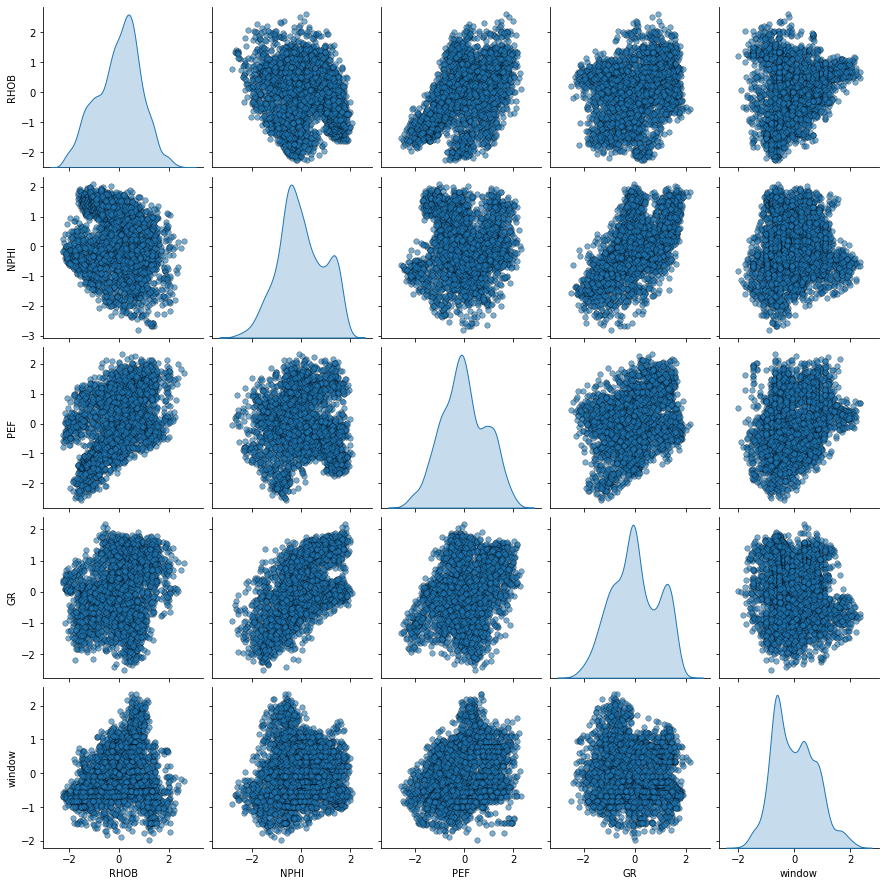

In [46]:
train_features = ['RHOB', 'NPHI', 'PEF', 'GR','window']

sns.pairplot(well_test_svm, vars=train_features, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

In [47]:
Y_test= well_test_svm.GR
X_test = well_test_svm.drop(['GR'],axis=1)


y_pr_well_2_Ridge = LRRidge.predict(X_test)
y_pr_well_2_Lasso = LRLasso.predict(X_test)

RRidge = round(r2_score(y_pr_well_2_Ridge , Y_test)*100,2)
RLasso = round(r2_score(y_pr_well_2_Lasso , Y_test)*100,2)

In [48]:
y_pr_well_2_RF = Regressor.predict(X_test)
RF = round(r2_score(y_pr_well_2_RF , Y_test)*100,2)
RF

92.29

In [49]:
# y_pr_well_2_RF = Regressor.predict(X_test)
y_pr_well_2_xgb = xgb.predict(X_test)
y_pr_well_2_lgbm = lgbm.predict(X_test)
y_pr_well_2_stack = stack.predict(X_test)
y_pr_well_2_LR = LR.predict(X_test)
y_pr_well_2_HGR = HGR.predict(X_test)
y_pr_well_2_DL = model.predict(X_test)


# RF = round(r2_score(y_pr_well_2_RF , Y_test)*100,2)
st = round(r2_score(y_pr_well_2_stack , Y_test)*100,2)
XGB = round(r2_score(y_pr_well_2_xgb , Y_test)*100,2)
LGBM = round(r2_score(y_pr_well_2_lgbm , Y_test)*100,2)
lr = round(r2_score(y_pr_well_2_LR , Y_test)*100,2)
HGr = round(r2_score(y_pr_well_2_HGR , Y_test)*100,2)
DL_R = round(r2_score(y_pr_well_2_DL , Y_test)*100,2)


print("R2_score of RandonForest:",RF)
print('='*50)
print("R2_score of Stacking  :",st)
print('='*50)
print("R2_score of XGBRegressor:",XGB)
print('='*50)
print("R2_score of lgbm:",LGBM)
print('='*50)
print("R2_score of LinearRegression:",lr)
print('='*50)
print("R2_score of HistGradientBoostingRegressor:",HGr)
print('='*50)
print("R2_score of Ridge:",RRidge)
print('='*50)
print("R2_score of Lasso:",RLasso)
print('='*50)
print("R2_score of DL:",DL_R)

R2_score of RandonForest: 92.29
R2_score of Stacking  : 92.14
R2_score of XGBRegressor: 91.43
R2_score of lgbm: 91.22
R2_score of LinearRegression: 72.06
R2_score of HistGradientBoostingRegressor: 90.23
R2_score of Ridge: 72.06
R2_score of Lasso: 70.99
R2_score of DL: 89.4


In [50]:
models = ['RandonForest','Stacking','XGBRegressor','LGBM Regressor','HistGradientBoosting Regressor',"Deep Learning",'LinearRegression','Ridge','Lasso']
acc = [RF,st,XGB,LGBM,HGr,DL_R,lr,RRidge,RLasso]

In [51]:
n = pd.DataFrame(models,columns=['models'])
n['accuracy']=acc

In [52]:
n

models  accuracy
0                    RandonForest     92.29
1                        Stacking     92.14
2                    XGBRegressor     91.43
3                  LGBM Regressor     91.22
4  HistGradientBoosting Regressor     90.23
5                   Deep Learning     89.40
6                LinearRegression     72.06
7                           Ridge     72.06
8                           Lasso     70.99

In [53]:
import plotly.express as px

fig = px.bar(n, y='accuracy', x='models', text='accuracy',range_y=(65,100))
fig.update_traces(  texttemplate="%{y}",textposition='outside')
fig.show()

In [54]:
R_Score_RF = round(Regressor.score(X_test,Y_test)*100,2)
R_Score_xgb= round(xgb.score(X_test,Y_test)*100,2)
R_Score_lgbm = round(lgbm.score(X_test,Y_test)*100,2)
R_Score_stack = round(stack.score(X_test,Y_test)*100,2)
R_Score_LR = round(LR.score(X_test,Y_test)*100,2)
R_Score_HGR = round(HGR.score(X_test,Y_test)*100,2)
R_Score_Ridge = round(LRRidge.score(X_test,Y_test)*100,2)
R_Score_Lasso = round(LRLasso.score(X_test,Y_test)*100,2)


In [55]:
R_acc = [R_Score_RF,R_Score_stack,R_Score_xgb,R_Score_lgbm,R_Score_HGR,R_Score_LR,R_Score_Ridge,R_Score_Lasso]
models = ['RandonForest','Stacking','XGBRegressor','LGBM Regressor','HistGradientBoosting Regressor','LinearRegression','Ridge','Lasso']

df_R_acc = pd.DataFrame(models,columns=['models'])
df_R_acc['accuracy']=R_acc

In [56]:
df_R_acc

models  accuracy
0                    RandonForest     93.06
1                        Stacking     92.54
2                    XGBRegressor     92.02
3                  LGBM Regressor     91.71
4  HistGradientBoosting Regressor     90.85
5                LinearRegression     77.61
6                           Ridge     77.61
7                           Lasso     77.65

In [57]:
import plotly.express as px

fig = px.bar(df_R_acc, y='accuracy', x='models', text='accuracy',range_y=(65,100))
fig.update_traces(  texttemplate="%{y}",textposition='outside')
fig.show()

# 

We have now obtained the prediction result (as GR logs). But, the prediction result is still in a normalized form. We need to de-normalize it back.

In [58]:
# # to save our model 
# import pickle
# with open('scaler.pkl' , 'wb') as w:
#     pickle.dump(scaler,w)


In [59]:
#R2_score after de-normalize:


Y= well_2['GR'].values
scaler.fit(Y.reshape(-1,1))
Y_test = scaler.inverse_transform(np.array(Y_test).reshape(-1,1))

y_pr_well_2_RF_1 = scaler.inverse_transform(y_pr_well_2_RF.reshape(-1,1))
y_pr_well_2_xgb_1 = scaler.inverse_transform(y_pr_well_2_xgb.reshape(-1,1))
y_pr_well_2_lgbm_1 = scaler.inverse_transform(y_pr_well_2_lgbm.reshape(-1,1))
y_pr_well_2_stack_1 = scaler.inverse_transform(y_pr_well_2_stack.reshape(-1,1))
y_pr_well_2_LR_1 = scaler.inverse_transform(y_pr_well_2_LR.reshape(-1,1))
y_pr_well_2_HGB_1 = scaler.inverse_transform(y_pr_well_2_HGR.reshape(-1,1))
y_pr_well_2_Ridge_1 = scaler.inverse_transform(y_pr_well_2_Ridge.reshape(-1,1))
y_pr_well_2_Lasso_1 = scaler.inverse_transform(y_pr_well_2_Lasso.reshape(-1,1))
y_pr_well_2_DL_1 = scaler.inverse_transform(y_pr_well_2_DL.reshape(-1,1))


RF1 = round(r2_score(y_pr_well_2_RF_1 , Y_test)*100,2)
st1 = round(r2_score(y_pr_well_2_stack_1 , Y_test)*100,2)
XGB1 = round(r2_score(y_pr_well_2_xgb_1 , Y_test)*100,2)
LGBM1 = round(r2_score(y_pr_well_2_lgbm_1 , Y_test)*100,2)
lr1 = round(r2_score(y_pr_well_2_LR_1 , Y_test)*100,2)
HGr1 = round(r2_score(y_pr_well_2_HGB_1 , Y_test)*100,2)
RRidge1 = round(r2_score(y_pr_well_2_Ridge_1, Y_test)*100,2)
RLasso1 = round(r2_score(y_pr_well_2_Lasso_1, Y_test)*100,2)
DL_R1 = round(r2_score(y_pr_well_2_DL_1, Y_test)*100,2)




In [60]:
acc_invers = [RF1,st1,XGB1,LGBM1,HGr1,DL_R1,lr1,RRidge1,RLasso1]
models = ['RandonForest','Stacking','XGBRegressor','LGBM Regressor','HistGradientBoosting Regressor',"Deep Learning",'LinearRegression','Ridge','Lasso']

df_acc_invers= pd.DataFrame(models,columns=['models'])
df_acc_invers['accuracy']=acc_invers
df_acc_invers

models  accuracy
0                    RandonForest     93.15
1                        Stacking     92.90
2                    XGBRegressor     92.00
3                  LGBM Regressor     91.87
4  HistGradientBoosting Regressor     90.92
5                   Deep Learning     90.14
6                LinearRegression     73.65
7                           Ridge     73.64
8                           Lasso     72.48

In [61]:
import plotly.express as px

fig = px.bar(df_acc_invers, y=df_acc_invers['accuracy'], x='models', text='accuracy',range_y=(65,100))
fig.update_traces(  texttemplate="%{y}",textposition='outside')
fig.show()

In [62]:
#Root Mean Squared Logarithmic Error

from math import sqrt
def RMSE(y_pred , y_actual):
    n = y_pred.size 
    RMSE = sqrt(((y_pred-y_actual)**2).sum()/n)
    return RMSE

In [63]:
RMSE_DL = RMSE(y_pr_well_2_DL_1,Y_test)
RMSE_RF = RMSE(y_pr_well_2_RF_1,Y_test)
RMSE_XGB= RMSE(y_pr_well_2_xgb_1,Y_test)
RMSE_LGBM = RMSE(y_pr_well_2_lgbm_1,Y_test)
RMSE_STACK = RMSE(y_pr_well_2_stack_1,Y_test)
RMSE_HGB = RMSE(y_pr_well_2_HGB_1,Y_test)
RMSE_RIDGE = RMSE(y_pr_well_2_Ridge_1,Y_test)
RMSE_LR = RMSE(y_pr_well_2_LR_1,Y_test)
RMSE_LASSO = RMSE(y_pr_well_2_Lasso_1,Y_test)


In [64]:
RMSE_models = [RMSE_RF, RMSE_STACK, RMSE_XGB, RMSE_LGBM, RMSE_HGB, RMSE_DL, RMSE_LR, RMSE_RIDGE, RMSE_LASSO]
RMSE_M = ['RandonForest','Stacking','XGBRegressor','LGBM Regressor','HistGradientBoosting Regressor',"Deep Learning",'LinearRegression','Ridge','Lasso']

df_RMSE_models= pd.DataFrame(RMSE_M,columns=['Models'])
df_RMSE_models['RMSE']=RMSE_models
df_RMSE_models

Models       RMSE
0                    RandonForest   5.801980
1                        Stacking   6.053043
2                    XGBRegressor   6.385273
3                  LGBM Regressor   6.463440
4  HistGradientBoosting Regressor   6.803286
5                   Deep Learning   7.243717
6                LinearRegression  11.060175
7                           Ridge  11.059822
8                           Lasso  11.029897

<ipython-input-65-4749eb2135a6>:22: MatplotlibDeprecationWarning:

Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.



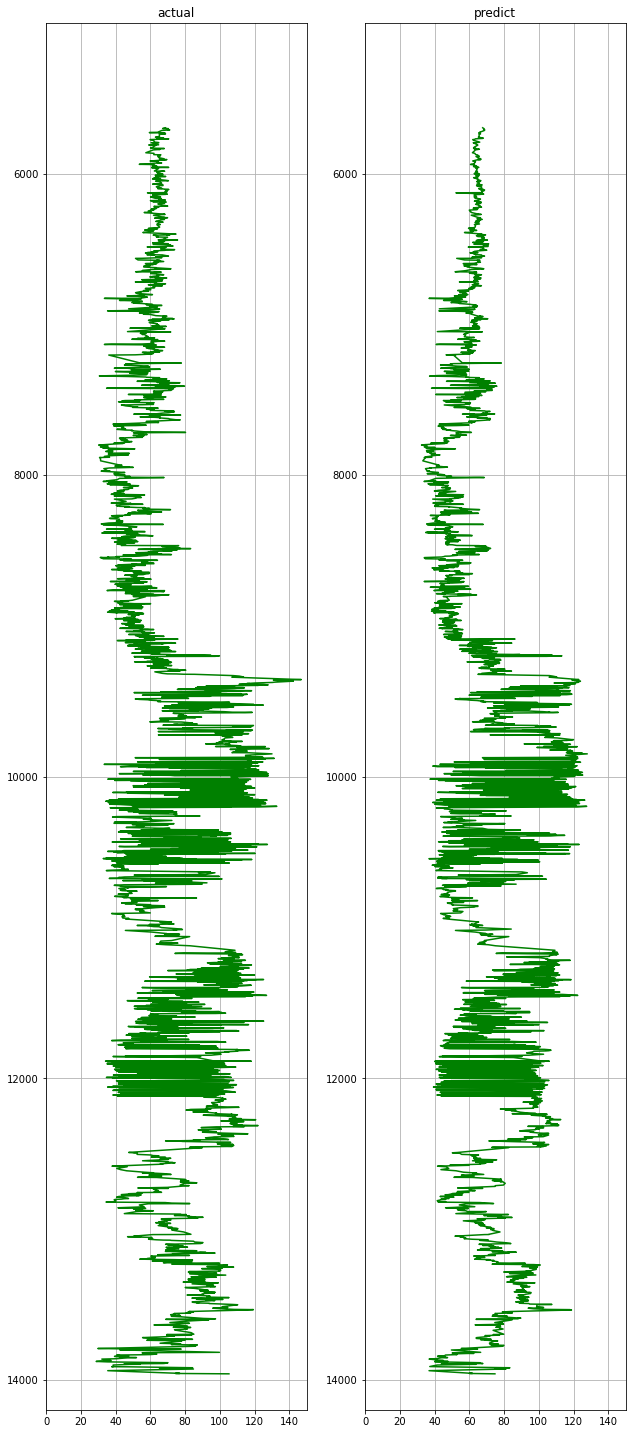

In [65]:
plt.figure(figsize=(9,20))
# ['NPHI', 'RHOB', 'GR', 'PEF', 'CALI', 'BS','DEPTH_MD']

plt.subplot(1,2,1)
plt.plot(Y_test, X_test['DEPTH_MD'], color='green')
plt.ylim(14200, 5000)
plt.xlim(0,150)
plt.title('actual', size=12)
plt.grid(True)


# =======================================================================


plt.subplot(1,2,2)
plt.plot(y_pr_well_2_RF_1, X_test['DEPTH_MD'], color='green')
plt.ylim(14200, 5000)
plt.xlim(0,150)
plt.title('predict', size=12)
plt.grid(True)

plt.tight_layout(1)
plt.show()